### V1535 Sco Spectral Index Work

In [1]:
#imports imports imports
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sympy import diff as dif

from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling.powerlaws import BrokenPowerLaw1D, SmoothlyBrokenPowerLaw1D, PowerLaw1D
from astropy.modeling import fitting, models

In [2]:
#now to get all of the data

In [3]:
data = ([57067.5, 4.55, 4.132, 0.0203],#B
[57067.5, 7.38, 2.786, 0.0128],
[57067.5, 28.2, 0.819, 0.0575],
[57067.5, 36.5, 0.675, 0.0834],

        [57071.5, 13.5, 0.416, 0.0175], #B
[57071.5, 17.4, 0.344, 0.0213],
[57071.5, 28.2, 0.295, 0.0505],
[57071.5, 36.5, 0.376, 0.0714],

[57072.5, 1.26, 1.57, 0.0765], #B
[57072.5, 1.74, 1.21, 0.0728],
[57072.5, 4.55, 0.65, 0.0168],
[57072.5, 7.38, 0.439, 0.0126],

[57072.5, 4.87, 0.484, 0.0505], #VLBA

[57077.6, 13.5, 0.385, 0.0163], #B
[57077.6, 17.4, 0.456, 0.02],
[57077.6, 28.2, 0.785, 0.0485],
[57077.6, 36.5, 0.845, 0.0758],

[57077.7, 4.87, 0.155, 0.0409], #VLBA

[57082.5, 1.26, 0.0142, 0.101], #B
[57082.5, 1.74, 0.12, 0.0655],
[57082.5, 4.55, 0.221, 0.0181],
[57082.5, 7.38, 0.192, 0.0157],

[57088.5, 13.5, 0.585, 0.0166], #B
[57088.5, 17.4, 0.755, 0.0207],
[57088.5, 28.2, 1.15, 0.0462],
[57088.5, 36.5, 1.68, 0.071],

[57091.4, 1.26, 0.153, 0.0738], #B
[57091.4, 1.74, 0.11, 0.0538],
[57091.4, 4.55, 0.455, 0.0187],
[57091.4, 7.38, 0.536, 0.0136],

[57106.42, 13.5, 0.267, 0.0126], #B
[57106.42, 17.4, 0.299, 0.0143],
[57106.42, 28.2, 0.348, 0.0405],
[57106.42, 36.5, 0.186, 0.0551],

[57106.47, 1.26, 0.273, 0.112], #B
[57106.47, 1.74, 0.163, 0.0597],
[57106.47, 4.55, 0.222, 0.0161],
[57106.47, 7.38, 0.253, 0.012],

[57119.41, 13.5, 0.457, 0.0248], #B
[57119.41, 17.4, 0.399, 0.0182],
[57119.41, 28.2, 0.323, 0.0446],
[57119.41, 36.5, 0.276, 0.0602],

[57120.57, 1.26, 0.873, 0.1], #B
[57120.57, 1.74, 0.661, 0.0562],
[57120.57, 4.55, 0.483, 0.0191],
[57120.57, 7.38, 0.374, 0.0138],

[57130.35, 1.26, 0.444, 0.0813], #B
[57130.35, 1.74, 0.258, 0.056],
[57130.35, 4.55, 0.256, 0.0172],
[57130.35, 7.38, 0.228, 0.0117],

[57131.33, 13.5, 0.209, 0.0156], #B
[57131.33, 17.4, 0.167, 0.0221],
[57131.33, 28.2, 0.173, 0.0482],
[57131.33, 36.5, 0.0395, 0.0833],

[57143.3, 1.26, -0.0723, 0.106], #B
[57143.3, 1.74, 0.165, 0.0711],
[57143.3, 4.55, 0.17, 0.0183],
[57143.3, 7.38, 0.139, 0.0144],

[57143.34, 13.5, 0.129, 0.0168], #B
[57143.34, 17.4, 0.164, 0.0216],
[57143.34, 28.2, 0.174, 0.0523],
[57143.34, 36.5, 0.0153, 0.0753],

[57158.3, 1.26, -0.152, 0.177], #B_> BnA
[57158.3, 1.74, 0.101, 0.0784],
[57158.3, 4.55, 0.0727, 0.023],
[57158.3, 7.38, 0.0708, 0.0171],
[57158.3, 13.5, 0.0518, 0.0175],
[57158.3, 16.5, 0.0217, 0.0214],
[57158.3, 29.5, 0.0401, 0.0362],
[57158.3, 35, -0.00361, 0.045],

[57187.2, 1.26, 0.277, 0.116], #BnA _> A
[57187.2, 1.74, -0.0505, 0.0776],
[57187.2, 5, 0.0194, 0.0204],
[57187.2, 7, 0.044, 0.0223],
[57187.2, 13.5, 0.0587, 0.0157],
[57187.2, 16.5, 0.0569, 0.021],
[57187.2, 29.5, 0.13, 0.0446],
[57187.2, 35, -0.0206, 0.0588],

#57360.7	1.26	XX	XX #D
#57360.7	1.74	XX	XX
[57360.7, 5, 0.0795, 0.031],
[57360.7, 7, 0.0561, 0.022],
[57360.7, 13.5, -0.0000599, 0.0196],
[57360.7, 16.5, -0.000577, 0.0199],
[57360.7, 29.6, -0.0157, 0.051],
[57360.7, 35, 0.0632, 0.0608],)



df =  pd.DataFrame(data, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

In [4]:
#splitting it up by day

In [5]:


E1 = ([57067.5, 4.55, 4.132, 0.0203],#B
[57067.5, 7.38, 2.786, 0.0128],
[57067.5, 28.2, 0.819, 0.0575],
[57067.5, 36.5, 0.675, 0.0834],)

E2 = ( [57071.5, 13.5, 0.416, 0.0175], #B
[57071.5, 17.4, 0.344, 0.0213],
[57071.5, 28.2, 0.295, 0.0505],
[57071.5, 36.5, 0.376, 0.0714],				
    )

E3 = ([57072.5, 1.26, 1.57, 0.0765], #B
[57072.5, 1.74, 1.21, 0.0728],
[57072.5, 4.55, 0.65, 0.0168],
[57072.5, 7.38, 0.439, 0.0126],

[57072.5, 4.87, 0.484, 0.0505], #VLBA
    )

E4 = ([57077.6, 13.5, 0.385, 0.0163], #B
[57077.6, 17.4, 0.456, 0.02],
[57077.6, 28.2, 0.785, 0.0485],
[57077.6, 36.5, 0.845, 0.0758],

[57077.7, 4.87, 0.155, 0.0409], #VLBA
    )

E5 = ([57082.5, 1.26, 0.0142, 0.101], #B
[57082.5, 1.74, 0.12, 0.0655],
[57082.5, 4.55, 0.221, 0.0181],
[57082.5, 7.38, 0.192, 0.0157],				
    )

E6 = (	[57088.5, 13.5, 0.585, 0.0166], #B
[57088.5, 17.4, 0.755, 0.0207],
[57088.5, 28.2, 1.15, 0.0462],
[57088.5, 36.5, 1.68, 0.071],			
    )

E7 = ([57091.4, 1.26, 0.153, 0.0738], #B
[57091.4, 1.74, 0.11, 0.0538],
[57091.4, 4.55, 0.455, 0.0187],
[57091.4, 7.38, 0.536, 0.0136],
    )

E8 = ([57106.42, 13.5, 0.267, 0.0126], #B
[57106.42, 17.4, 0.299, 0.0143],
[57106.42, 28.2, 0.348, 0.0405],
[57106.42, 36.5, 0.186, 0.0551],

[57106.47, 1.26, 0.273, 0.112], #B
[57106.47, 1.74, 0.163, 0.0597],
[57106.47, 4.55, 0.222, 0.0161],
[57106.47, 7.38, 0.253, 0.012],
    )

E9 = ([57119.41, 13.5, 0.457, 0.0248], #B
[57119.41, 17.4, 0.399, 0.0182],
[57119.41, 28.2, 0.323, 0.0446],
[57119.41, 36.5, 0.276, 0.0602],
    )

E10 = ([57120.57, 1.26, 0.873, 0.1], #B
[57120.57, 1.74, 0.661, 0.0562],
[57120.57, 4.55, 0.483, 0.0191],
[57120.57, 7.38, 0.374, 0.0138],
    )

E11 = ([57130.35, 1.26, 0.444, 0.0813], #B
[57130.35, 1.74, 0.258, 0.056],
[57130.35, 4.55, 0.256, 0.0172],
[57130.35, 7.38, 0.228, 0.0117],

				
    )

E12 = (		[57131.33, 13.5, 0.209, 0.0156], #B
[57131.33, 17.4, 0.167, 0.0221],
[57131.33, 28.2, 0.173, 0.0482],
[57131.33, 36.5, 0.0395, 0.0833],		
    )


E13 =([57143.3, 1.26, -0.0723, 0.106], #B
[57143.3, 1.74, 0.165, 0.0711],
[57143.3, 4.55, 0.17, 0.0183],
[57143.3, 7.38, 0.139, 0.0144],

[57143.34, 13.5, 0.129, 0.0168], #B
[57143.34, 17.4, 0.164, 0.0216],
[57143.34, 28.2, 0.174, 0.0523],
[57143.34, 36.5, 0.0153, 0.0753],
    )

E14 = ([57158.3, 1.26, -0.152, 0.177], #B_> BnA
[57158.3, 1.74, 0.101, 0.0784],
[57158.3, 4.55, 0.0727, 0.023],
[57158.3, 7.38, 0.0708, 0.0171],
[57158.3, 13.5, 0.0518, 0.0175],
[57158.3, 16.5, 0.0217, 0.0214],
[57158.3, 29.5, 0.0401, 0.0362],
[57158.3, 35, -0.00361, 0.045],
    )

E15 = ([57187.2, 1.26, 0.277, 0.116], #BnA _> A
[57187.2, 1.74, -0.0505, 0.0776],
[57187.2, 5, 0.0194, 0.0204],
[57187.2, 7, 0.044, 0.0223],
[57187.2, 13.5, 0.0587, 0.0157],
[57187.2, 16.5, 0.0569, 0.021],
[57187.2, 29.5, 0.13, 0.0446],
[57187.2, 35, -0.0206, 0.0588],
				
    )

E16 = (#57360.7	1.26	XX	XX #D
#57360.7	1.74	XX	XX
[57360.7, 5, 0.0795, 0.031],
[57360.7, 7, 0.0561, 0.022],
[57360.7, 13.5, -0.0000599, 0.0196],
[57360.7, 16.5, -0.000577, 0.0199],
[57360.7, 29.6, -0.0157, 0.051],
[57360.7, 35, 0.0632, 0.0608],)

In [6]:
df1 =  pd.DataFrame(E1, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df2 =  pd.DataFrame(E2, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df3 =  pd.DataFrame(E3, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df4 =  pd.DataFrame(E4, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df5 =  pd.DataFrame(E5, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df6 =  pd.DataFrame(E6, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df7 =  pd.DataFrame(E7, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df8 =  pd.DataFrame(E8, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df9 =  pd.DataFrame(E9, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df10 =  pd.DataFrame(E10, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df11 =  pd.DataFrame(E11, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df12 =  pd.DataFrame(E12, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df13 =  pd.DataFrame(E13, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df14 =  pd.DataFrame(E14, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df15 =  pd.DataFrame(E15, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df16 =  pd.DataFrame(E16, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

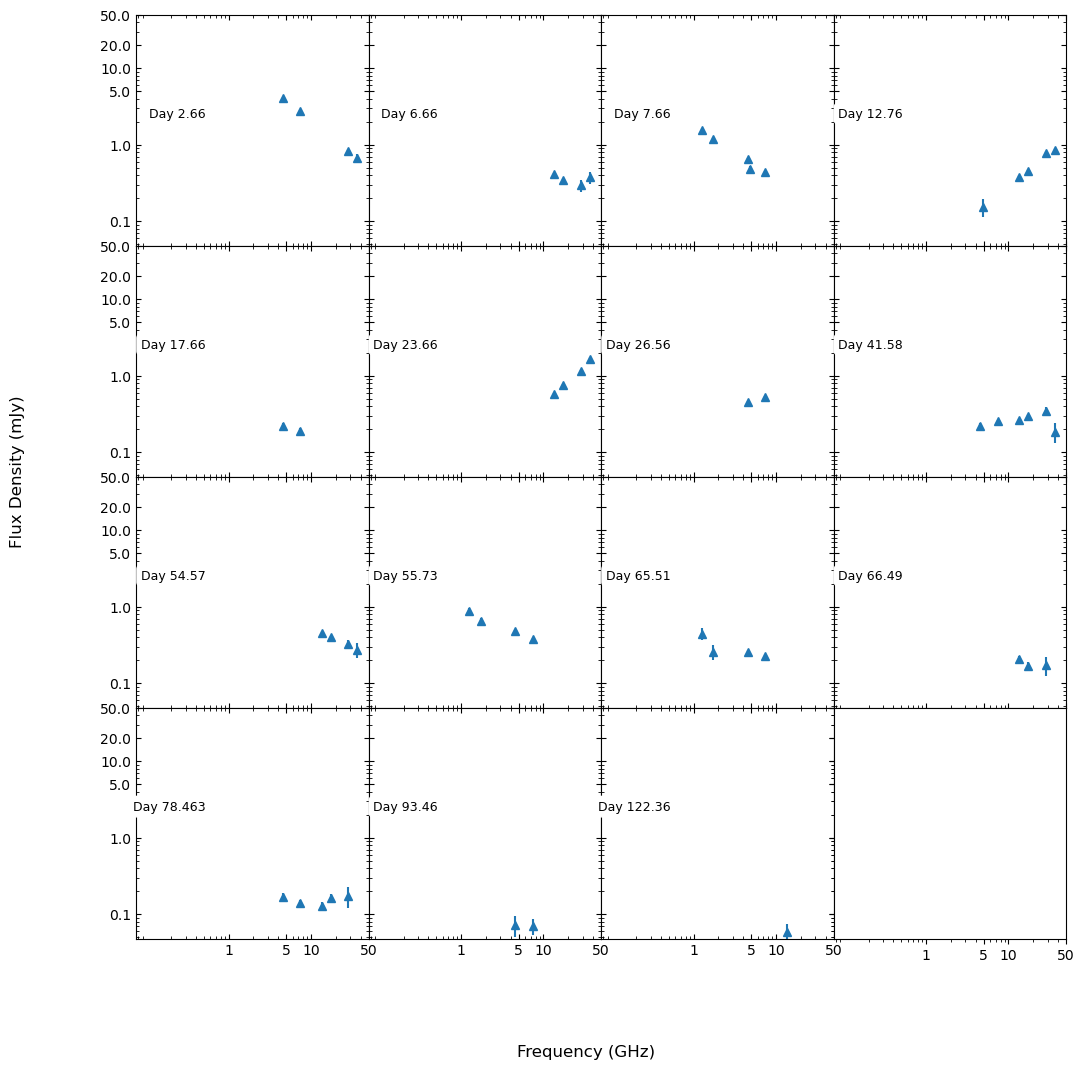

In [7]:
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10,
       df11, df12, df13, df14, df15, df16]


#the days by the list so they can all be defined
annotations = ['Day 2.66', 'Day 6.66', 'Day 7.66', 'Day 12.76', 'Day 17.66', 'Day 23.66',
               'Day 26.56', 'Day 41.58', 'Day 54.57', 'Day 55.73', 'Day 65.51', 'Day 66.49',
               'Day 78.463', 'Day 93.46', 'Day 122.36', 'Day 295.86' ]

#making the figure (4,4) is the (rows, columns)
fig, ax = plt.subplots(4, 4, sharex='all', sharey='all')
fig.set_size_inches(12, 12)
fig.subplots_adjust(hspace=0, wspace=0)

#loop for each of the datasets
for idx, (df, label) in enumerate(zip(dfs, annotations)):
    row, col = divmod(idx, 4)
    mask = df['Flux Density (mJy)'] > 3 * df['Uncertainty (mJy)'] #don't show the non-detections
    if mask.any():
        ax[row, col].errorbar(df['Freq (GHz)'][mask], df['Flux Density (mJy)'][mask], yerr=df['Uncertainty (mJy)'][mask], fmt='^')
        ax[row, col].set_xscale('log')
        ax[row, col].set_yscale('log')
        ax[row, col].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
        ax[row, col].set_yticks([.1, 1, 5, 10, 20, 50], labels=['0.1','1.0', '5.0', '10.0', '20.0', '50.0'])
        ax[row, col].annotate(label, xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
        ax[row, col].tick_params(axis='both', which='both', direction='in', top=True, right=True)

fig.supxlabel("Frequency (GHz)")
fig.supylabel("Flux Density (mJy)")
plt.show();

# Finding the alpha for each day

In [8]:
def error(err, freq, flux):
    yerr = []
    for i in range(len(freq)):
        if freq[i] < 10:
            pl = np.sqrt(err[i]**2 + (flux[i]*0.05)**2)
            yerr.append(pl)
        else:
            pl =np.sqrt(err[i]**2 + (flux[i]*0.1)**2)
            yerr.append(pl)

    return(yerr)



#### Day 2.7

In [9]:
mask = df1['Flux Density (mJy)'] > 3 * df1['Uncertainty (mJy)']  # apply detection threshold
if mask.any():
    x1 = df1['Freq (GHz)'][mask].values.tolist()
    y1 = df1['Flux Density (mJy)'][mask].values.tolist()
    yerr1 = df1['Uncertainty (mJy)'][mask].values.tolist()


In [10]:
yerr1 = error(yerr1, x1, y1)

In [11]:
PL1 =  PowerLaw1D(amplitude = y1[0], x_0= x1[0], alpha= 1,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x1), max(x1)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit1 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model1 = fit1(PL1, x1, y1, maxiter=10000)

    #weight is 1/error^2
y_weight1 = 1/ (np.power(yerr1,2))  

    # fit the data using the uncertainties as weights
fit_model_weights1 = fit1(PL1, x1, y1, weights=y_weight1, maxiter=10000)

fit_model_weights1

<PowerLaw1D(amplitude=4.21995798, x_0=4.55, alpha=0.88792945)>

In [12]:
fit1.fit_info

{'nfev': 32,
 'fvec': array([ 2.04099435, -2.01100142,  1.63051861, -0.92871972]),
 'fjac': array([[ 2.02307922e+02, -3.28997400e+01, -2.92625432e+01,
          5.75186082e-01],
        [-3.28997400e+01, -2.92580314e+01, -2.60234400e+01,
         -6.00221168e-01],
        [-2.92625432e+01, -2.60234400e+01,  7.94410929e-15,
          4.47213595e-01]]),
 'ipvt': array([3, 1, 2], dtype=int32),
 'qtf': array([6.97239678e-05, 7.86847261e-05, 2.47018316e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 1.25357056e+28, -1.40938350e+28, -1.45799099e+12],
        [-1.40938350e+28,  1.58456325e+28,  1.63921242e+12],
        [-1.45799099e+12,  1.63921242e+12,  2.24901122e-04]]),
 'njev': 19,
 'cov_x': array([[ 1.25357056e+28, -1.40938350e+28, -1.45799099e+12],
        [-1.40938350e+28,  1.58456325e+28,  1.63921242e+12],
        [-1.45799099e+12,  1.63921242e+12,  2.24901122e-04]]

In [13]:
fvec1 = np.array([ 2.04099435, -2.01100142,  1.63051861, -0.92871972])
var1 = np.var(fvec1)

param_cov1= np.array([[ 1.25357056e+28, -1.40938350e+28, -1.45799099e+12],
        [-1.40938350e+28,  1.58456325e+28,  1.63921242e+12],
        [-1.45799099e+12,  1.63921242e+12,  2.24901122e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag1 = stand(param_cov1*var1) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print("The standard deviation is", diag1[2]) #Just showing the standard devation on the slope


The standard deviation is 0.025535181269153717


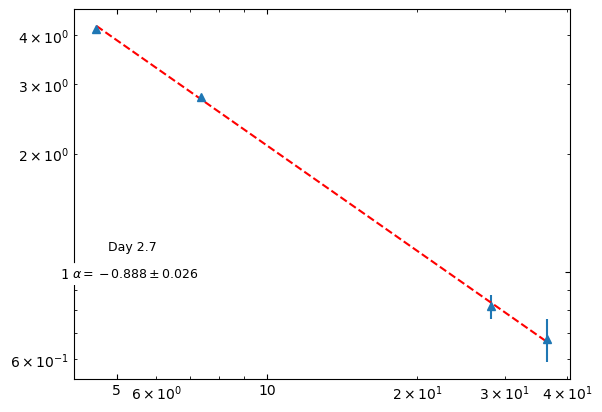

In [14]:
fig,ax = plt.subplots()
mask = df1['Flux Density (mJy)'] > 3 * df1['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df1['Freq (GHz)'][mask], df1['Flux Density (mJy)'][mask], yerr=df1['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 2.7', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df1['Freq (GHz)'][mask], fit_model_weights1(df1['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.888 \\pm 0.026}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    #ax.annotate('${\u03B1 2 =  \\pm }$', xy=(90, 60), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
plt.show();

#### Day 6.66

In [15]:
mask = df2['Flux Density (mJy)'] > 3 * df2['Uncertainty (mJy)']  # apply detection threshold
if mask.any():
    x2 = df2['Freq (GHz)'][mask].values.tolist()
    y2 = df2['Flux Density (mJy)'][mask].values.tolist()
    yerr2 = df2['Uncertainty (mJy)'][mask].values.tolist()


In [16]:
yerr2 = error(yerr2, x2, y2)

In [17]:
PL2 =  PowerLaw1D(amplitude = y2[0], x_0= x2[0], alpha= 1,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x2), max(x2)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit2 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model2 = fit2(PL2, x2, y2)

    #weight is 1/error^2
y_weight2 = 1/ (np.power(yerr2,2))  

    # fit the data using the uncertainties as weights
fit_model_weights2 = fit2(PL2, x2, y2, weights=y_weight2)

fit_model_weights2

<PowerLaw1D(amplitude=0.39798374, x_0=13.5, alpha=0.38520096)>

In [18]:
fit2.fit_info

{'nfev': 21,
 'fvec': array([ -8.84533374,  10.3352929 ,   1.36335319, -16.07635324]),
 'fjac': array([[-7.71410719e+02,  6.14553021e+01, -7.77978154e+00,
          1.34338068e-01],
        [ 7.10545665e+01,  6.97954665e+01, -1.63975968e+00,
          5.13432308e-01],
        [-8.99497662e+00, -1.14372973e-15,  5.64719327e-16,
          9.26027979e-01]]),
 'ipvt': array([1, 3, 2], dtype=int32),
 'qtf': array([ 8.12322803e-04, -1.05494541e-03,  2.08416894e+01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 4.26347221e+26, -3.65636099e+28, -5.99163382e+11],
        [-3.65636099e+28,  3.13570138e+30,  5.13843532e+13],
        [-5.99163382e+11,  5.13843532e+13,  1.04730858e-03]]),
 'njev': 9,
 'cov_x': array([[ 4.26347221e+26, -3.65636099e+28, -5.99163382e+11],
        [-3.65636099e+28,  3.13570138e+30,  5.13843532e+13],
        [-5.99163382e+11,  5.13843532e+13,  1.04730858

In [19]:
fvec2 = np.array([ -8.84533374,  10.3352929 ,   1.36335319, -16.07635324])
var2 = np.var(fvec2)


param_cov2 = np.array([[ 4.26347221e+26, -3.65636099e+28, -5.99163382e+11],
        [-3.65636099e+28,  3.13570138e+30,  5.13843532e+13],
        [-5.99163382e+11,  5.13843532e+13,  1.04730858e-03]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag2 = stand(param_cov2*var2) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print("The standard deviation is", diag2[2]) #Just showing the standard devation on the slope


The standard deviation is 0.3242898184565944


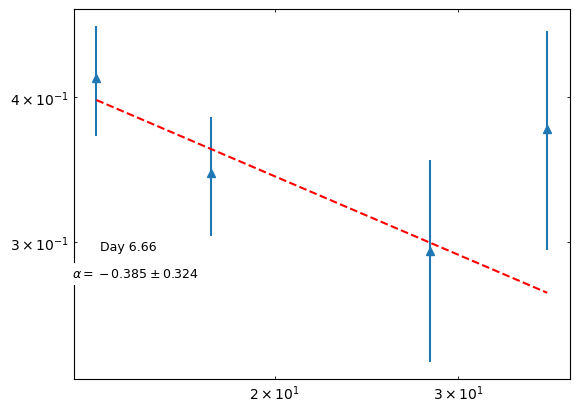

In [20]:
fig,ax = plt.subplots()
mask = df2['Flux Density (mJy)'] > 3 * df2['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df2['Freq (GHz)'][mask], df2['Flux Density (mJy)'][mask], yerr=yerr2, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 6.66', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df2['Freq (GHz)'][mask], fit_model_weights2(df2['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.385 \\pm 0.324}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

#### Day 7.66

In [21]:
mask = df3['Flux Density (mJy)'] > 3 * df3['Uncertainty (mJy)']  # apply detection threshold
if mask.any():
    x3 = df3['Freq (GHz)'][mask].values.tolist()
    y3 = df3['Flux Density (mJy)'][mask].values.tolist()
    yerr3 = df3['Uncertainty (mJy)'][mask].values.tolist()


In [22]:
PL3 =  PowerLaw1D(amplitude = y3[0], x_0= x3[0], alpha= 1,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x3), max(x3)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit3 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model3 = fit3(PL3, x3, y3)

    #weight is 1/error^2
y_weight3 = 1/ (np.power(yerr3,2))  

    # fit the data using the uncertainties as weights
fit_model_weights3 = fit3(PL3, x3, y3, weights=y_weight3)
fit_model_weights3

<PowerLaw1D(amplitude=1.74160665, x_0=1.26, alpha=0.77699218)>

In [23]:
fit3.fit_info

{'nfev': 21,
 'fvec': array([ 29.3231915 ,  27.4140847 , -27.65075709,  12.76144573,
         49.07820155]),
 'fjac': array([[ 5.72096618e+03, -2.19806797e+03, -2.04062021e+03,
          8.57791470e-01,  5.64420577e-02],
        [-2.19806797e+03, -3.98235571e+02, -3.69709930e+02,
         -8.24929979e-01,  3.26116305e-02],
        [-2.04062021e+03, -3.69709930e+02,  3.86642337e-13,
          5.88072370e-01,  1.83772615e-02]]),
 'ipvt': array([3, 2, 1], dtype=int32),
 'qtf': array([-1.43274728e-03, -2.59593799e-04,  3.87560805e+01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 6.68930788e+24, -6.21015230e+24, -1.74643093e+08],
        [-6.21015230e+24,  5.76531866e+24,  1.62133397e+08],
        [-1.74643093e+08,  1.62133397e+08,  9.65928077e-07]]),
 'njev': 9,
 'cov_x': array([[ 6.68930788e+24, -6.21015230e+24, -1.74643093e+08],
        [-6.21015230e+24,  5.76531866e+24,

In [24]:
fvec3 = np.array([ 29.3231915 ,  27.4140847 , -27.65075709,  12.76144573,
         49.07820155])
var3 = np.var(fvec3)


param_cov3= np.array([[ 6.68930788e+24, -6.21015230e+24, -1.74643093e+08],
        [-6.21015230e+24,  5.76531866e+24,  1.62133397e+08],
        [-1.74643093e+08,  1.62133397e+08,  9.65928077e-07]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag3 = stand(param_cov3*var3) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print("The standard deviation is", diag3[2]) #Just showing the standard devation on the slope


The standard deviation is 0.02522588092819713


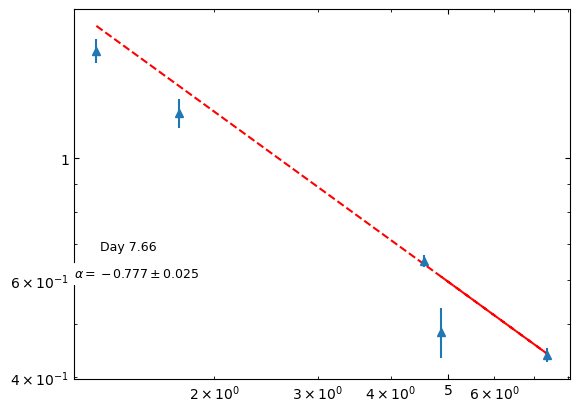

In [25]:
fig,ax = plt.subplots()
mask = df3['Flux Density (mJy)'] > 3 * df3['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df3['Freq (GHz)'][mask], df3['Flux Density (mJy)'][mask], yerr=yerr3, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 7.66', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df3['Freq (GHz)'][mask], fit_model_weights3(df3['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.777 \\pm 0.025}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

#### Day 12.76

In [26]:
mask = df4['Flux Density (mJy)'] > 3 * df4['Uncertainty (mJy)']  # apply detection threshold
if mask.any():
    x4 = df4['Freq (GHz)'][mask].values.tolist()
    y4 = df4['Flux Density (mJy)'][mask].values.tolist()
    yerr4 = df4['Uncertainty (mJy)'][mask].values.tolist()


In [27]:
yerr4 = error(yerr4, x4, y4)

In [28]:
PL4 =  PowerLaw1D(amplitude = y4[0], x_0= x4[0], alpha= .5,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x4), max(x4)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit4 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model4 = fit4(PL4, x4, y4, maxiter=10000)

    #weight is 1/error^2
y_weight4 = 1/ (np.power(yerr4,2))  

    # fit the data using the uncertainties as weights
fit_model_weights4 = fit4(PL4, x4, y4, weights=y_weight4, maxiter=10000)

fit_model_weights4

<PowerLaw1D(amplitude=0.74036931, x_0=29.29905622, alpha=-0.86672977)>

In [29]:
fit4.fit_info

{'nfev': 20,
 'fvec': array([-3.8628409 ,  6.17367066, -8.07598399,  3.93547376,  0.75550331]),
 'fjac': array([[-4.33495449e+02, -2.14751116e+02,  9.49430180e+00,
          2.16581353e-01,  2.81050884e-01],
        [-2.14751116e+02,  1.35105520e+02, -3.91995050e-15,
          4.79231737e-01, -7.22896234e-01],
        [ 9.49430180e+00, -7.45453330e-16,  7.92206217e-16,
          7.79245194e-01, -6.14878243e-01]]),
 'ipvt': array([1, 3, 2], dtype=int32),
 'qtf': array([-5.92516211e-05,  1.66190617e-10,  3.47843554e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[7.64329264e+26, 3.48981173e+28, 1.92552589e+11],
        [3.48981173e+28, 1.59339521e+30, 8.79165977e+12],
        [1.92552589e+11, 8.79165977e+12, 1.03292553e-04]]),
 'njev': 8,
 'cov_x': array([[7.64329264e+26, 3.48981173e+28, 1.92552589e+11],
        [3.48981173e+28, 1.59339521e+30, 8.79165977e+12],
        [

In [30]:
fvec4 = np.array([-3.8628409 ,  6.17367066, -8.07598399,  3.93547376,  0.75550331])
var4 = np.var(fvec4)


param_cov4= np.array([[7.64329264e+26, 3.48981173e+28, 1.92552589e+11],
        [3.48981173e+28, 1.59339521e+30, 8.79165977e+12],
        [1.92552589e+11, 8.79165977e+12, 1.03292553e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag4 = stand(param_cov4*var4) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print("The standard deviation is", diag4[2]) #Just showing the standard devation on the slope


The standard deviation is 0.05263080119109629


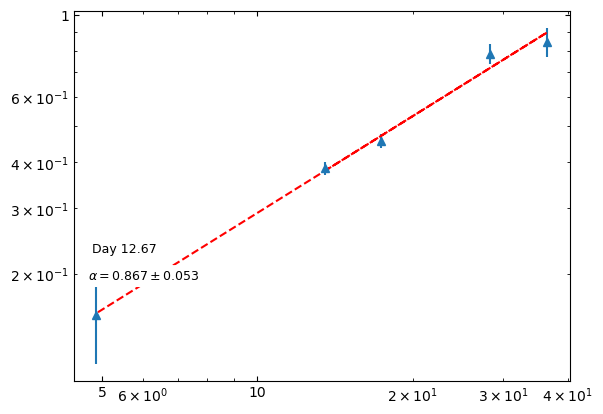

In [31]:
fig,ax = plt.subplots()
mask = df4['Flux Density (mJy)'] > 3 * df4['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df4['Freq (GHz)'][mask], df4['Flux Density (mJy)'][mask], yerr=df4['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 12.67', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df4['Freq (GHz)'][mask], fit_model_weights4(df4['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.867 \\pm 0.053}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

#### Day 17.66

In [32]:
#This one only has two points

mask = df5['Flux Density (mJy)'] > 3 * df5['Uncertainty (mJy)']  # apply detection threshold
if mask.any():
    x5 = df5['Freq (GHz)'][mask].values.tolist()
    y5 = df5['Flux Density (mJy)'][mask].values.tolist()
    yerr5 = df5['Uncertainty (mJy)'][mask].values.tolist()


In [33]:
yerr5 = error(yerr5, x5, y5)

In [34]:
fit5 = fitting.LevMarLSQFitter(calc_uncertainties=True)

PL5 =  PowerLaw1D(amplitude = y5[0], x_0= x5[0], alpha= 0,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        #'x_0': (x3[0], x3[0]),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    },
                 fixed={'x_0': True}) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 


    #Fit the data w/o weights
fit_model5 = fit5(PL5, x5, y5)

    #weight is 1/error^2#y_weight5 = 1/ (np.power(yerr5,2))  

    # fit the data using the uncertainties as weights
fit_model_weights5 = fit5(PL5, x5, y5)#, weights=y_weight5)

fit_model_weights5

<PowerLaw1D(amplitude=0.221, x_0=4.55, alpha=0.29084746)>

In [35]:
fit5.fit_info

{'nfev': 5,
 'fvec': array([0., 0.]),
 'fjac': array([[-1.32467947,  0.65584038],
        [ 0.06090141,  0.07010006]]),
 'ipvt': array([1, 2], dtype=int32),
 'qtf': array([-1.24506014e-10, -1.43311610e-10]),
 'message': 'The relative error between two consecutive iterates is at most 0.000000',
 'ierr': 2,
 'param_jac': None,
 'param_cov': None,
 'njev': 4,
 'cov_x': array([[  1.        ,   9.35577485],
        [  9.35577485, 203.49944302]])}

In [36]:
#taking fvec
fvec5 = np.array([0., 0.])
var5 = np.var(fvec5)

#taking cov_x
cov_x5 = np.array([[1.07328312e-07, 1.00413952e-06],
        [1.00413952e-06, 1.64404641e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    #sd3 = np.sqrt(diag[2])
    return(sd1,sd2)#,sd3)

diag5 = stand(cov_x5)#*var5) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag5[1]) #Just showing the standard deviation on the slope


The error/standard deviation is 0.004054684217050694


In [37]:
#Error on alpha for only two data points
def two_points(Flux, Freq, Err):
    
    alpha = (np.log10(Flux[0]/Flux[1])) / (np.log10(Freq[0]/Freq[1]))
    
    
    der_s1 = 1 / (Flux[0] * np.log(Freq[0]/Freq[1]))
    der_s2 = -1 / (Flux[1] * np.log(Freq[0]/Freq[1]))
    
    
    err_alph_squared = (der_s1)**2 * (Err[0]**2) + (der_s2)**2 * (Err[1]**2) 
    err_alph = np.sqrt(err_alph_squared)
    
    return(alpha, err_alph)

In [38]:
alpha_err5 = two_points(y5,x5,yerr5)
print(alpha_err5)

(-0.29084746179610177, 0.2804219056541765)


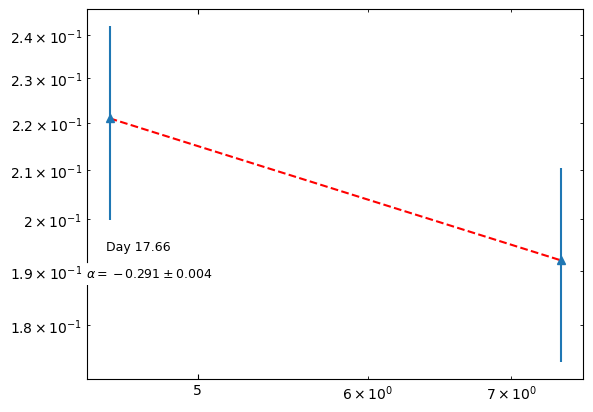

In [39]:
fig,ax = plt.subplots()
mask = df5['Flux Density (mJy)'] > 3 * df5['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df5['Freq (GHz)'][mask], df5['Flux Density (mJy)'][mask], yerr=yerr5, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 17.66', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df5['Freq (GHz)'][mask], fit_model_weights5(df5['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.291 \\pm 0.004}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

#### Day 23.66

In [40]:
mask = df6['Flux Density (mJy)'] > 3 * df6['Uncertainty (mJy)']  # apply detection threshold
if mask.any():
    x6 = df6['Freq (GHz)'][mask].values.tolist()
    y6 = df6['Flux Density (mJy)'][mask].values.tolist()
    yerr6 = df6['Uncertainty (mJy)'][mask].values.tolist()


In [41]:
yerr6 = error(yerr6, x6, y6)

In [42]:
PL6 =  PowerLaw1D(amplitude = y6[0], x_0= x6[0], alpha= -1,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x6), max(x6)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit6 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model6 = fit6(PL6, x6, y6, maxiter=10000)

    #weight is 1/error^2
y_weight6 = 1/ (np.power(yerr6,2))  

    # fit the data using the uncertainties as weights
fit_model_weights6 = fit6(PL6, x6, y6, weights=y_weight6, maxiter=10000)

fit_model_weights6

<PowerLaw1D(amplitude=0.59542468, x_0=13.74584328, alpha=-0.98025691)>

In [43]:
fit6.fit_info

{'nfev': 7,
 'fvec': array([-0.00434037, -0.78139801,  3.5368173 , -3.88191752]),
 'fjac': array([[-3.68515505e+02,  4.33322537e+01,  1.56471317e+01,
          2.12065666e-01],
        [ 4.33322537e+01,  6.46001264e+01,  4.58024169e-15,
          6.26695947e-01],
        [ 1.56471317e+01,  1.92217490e-15, -1.42284406e-15,
          3.75656779e-01]]),
 'ipvt': array([1, 3, 2], dtype=int32),
 'qtf': array([-2.18072198e-04, -1.45284424e-06, -2.39974853e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 8.90519302e+26,  2.09731838e+28, -6.24056480e+11],
        [ 2.09731838e+28,  4.93952729e+29, -1.46975492e+13],
        [-6.24056480e+11, -1.46975492e+13,  6.76950781e-04]]),
 'njev': 4,
 'cov_x': array([[ 8.90519302e+26,  2.09731838e+28, -6.24056480e+11],
        [ 2.09731838e+28,  4.93952729e+29, -1.46975492e+13],
        [-6.24056480e+11, -1.46975492e+13,  6.76950781e-04]

In [44]:
#taking fvec
fvec6 = np.array([-0.00434037, -0.78139801,  3.5368173 , -3.88191752])
var6 = np.var(fvec6)



param_cov6= np.array([[ 8.90519302e+26,  2.09731838e+28, -6.24056480e+11],
        [ 2.09731838e+28,  4.93952729e+29, -1.46975492e+13],
        [-6.24056480e+11, -1.46975492e+13,  6.76950781e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag6 = stand(param_cov6*var6) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print("The standard deviation is", diag6[2]) #Just showing the standard devation on the slope


The standard deviation is 0.06867699636648604


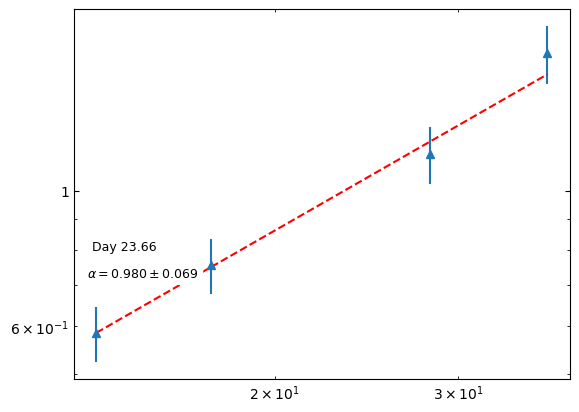

In [45]:
fig,ax = plt.subplots()
mask = df6['Flux Density (mJy)'] > 3 * df6['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df6['Freq (GHz)'][mask], df6['Flux Density (mJy)'][mask], yerr=yerr6, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 23.66', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df6['Freq (GHz)'][mask], fit_model_weights6(df6['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.980 \\pm 0.069}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

#### Day 26.56

In [46]:
mask = df7['Flux Density (mJy)'] > 3 * df7['Uncertainty (mJy)']  # apply detection threshold
if mask.any():
    x7 = df7['Freq (GHz)'][mask].values.tolist()
    y7 = df7['Flux Density (mJy)'][mask].values.tolist()
    yerr7 = df7['Uncertainty (mJy)'][mask].values.tolist()


In [47]:
yerr7 = error(yerr7, x7,y7)

In [48]:
fit7 = fitting.LevMarLSQFitter(calc_uncertainties=True)

PL7 =  PowerLaw1D(amplitude = y7[0], x_0= x7[0], alpha= -.3,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        #'x_0': (x3[0], x3[0]),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    },
                 fixed={'x_0': True}) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 


    #Fit the data w/o weights
fit_model7 = fit7(PL7, x7, y7)

    #weight is 1/error^2
y_weight7 = 1/ (np.power(yerr7,2))  

    # fit the data using the uncertainties as weights
fit_model_weights7 = fit7(PL7, x7, y7, weights=y_weight7)

fit_model_weights7

<PowerLaw1D(amplitude=0.455, x_0=4.55, alpha=-0.33875315)>

In [49]:
fit7.fit_info

{'nfev': 4,
 'fvec': array([0.00000000e+00, 1.22921061e-13]),
 'fjac': array([[-1.74089015e+03,  7.49200577e-01],
        [ 2.15033902e+02,  1.90104284e+02]]),
 'ipvt': array([1, 2], dtype=int32),
 'qtf': array([-6.94445641e-06, -6.13936176e-06]),
 'message': 'The relative error between two consecutive iterates is at most 0.000000',
 'ierr': 2,
 'param_jac': None,
 'param_cov': None,
 'njev': 3,
 'cov_x': array([[7.52126899e-07, 3.41784025e-06],
        [3.41784025e-06, 2.76704481e-05]])}

In [50]:
#taking fvec
fvec6 = np.array([0.00000000e+00, 6.00250338e-13])
var6 = np.var(fvec6)



param_cov6= np.array([[1.22283096e-07, 5.55682942e-07],
        [5.55682942e-07, 3.03421437e-06]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    #sd3 = np.sqrt(diag[2])
    return(sd1,sd2)#,sd3)

diag6 = stand(param_cov6*var6) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print("The standard deviation is", diag6) #Just showing the standard devation on the slope


The standard deviation is (1.0495077030469695e-16, 5.227879250565843e-16)


In [51]:
#Same slope as PL7
alpha_err7 = two_points(y7,x7,yerr7)
print(alpha_err7)

(0.33875314735322787, 0.17705589018316745)


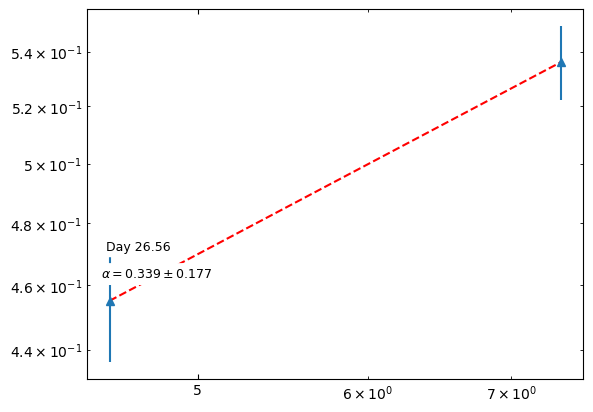

In [52]:
fig,ax = plt.subplots()
mask = df7['Flux Density (mJy)'] > 3 * df7['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df7['Freq (GHz)'][mask], df7['Flux Density (mJy)'][mask], yerr=df7['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 26.56', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df7['Freq (GHz)'][mask], fit_model_weights7(df7['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.339 \\pm 0.177}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

#### Day 41.58

In [53]:
mask = df8['Flux Density (mJy)'] > 3 * df8['Uncertainty (mJy)']  # apply detection threshold
if mask.any():
    x8 = df8['Freq (GHz)'][mask].values.tolist()
    y8 = df8['Flux Density (mJy)'][mask].values.tolist()
    yerr8 = df8['Uncertainty (mJy)'][mask].values.tolist()


In [54]:
yerr8 = error(yerr8, x8, y8)

In [55]:
fit8 = fitting.LevMarLSQFitter(calc_uncertainties=True)

PL8 =  PowerLaw1D(amplitude = y8[0], x_0= x8[0], alpha= -.3,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        #'x_0': (x3[0], x3[0]),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    },
                 fixed={'x_0': True}) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 


    #Fit the data w/o weights
fit_model8 = fit8(PL8, x8, y8)

    #weight is 1/error^2
y_weight8 = 1/ (np.power(yerr8,2))  

    # fit the data using the uncertainties as weights
fit_model_weights8 = fit8(PL8, x8, y8, weights=y_weight8)

fit_model_weights8

<PowerLaw1D(amplitude=0.27589296, x_0=13.5, alpha=-0.17515934)>

In [56]:
fit8.fit_info

{'nfev': 6,
 'fvec': array([ 10.20244476,  -9.61891071, -11.96318393,  42.10544448,
         15.79128952, -15.79111272]),
 'fjac': array([[-3.99155797e+03,  2.38431105e-01,  9.99660990e-02,
          8.81759285e-02,  5.41482806e-01,  7.41329280e-01],
        [-6.84146593e+02,  4.64693427e+02,  2.88828253e-01,
          3.08673478e-01, -7.76359822e-01, -2.13211783e-01]]),
 'ipvt': array([1, 2], dtype=int32),
 'qtf': array([ 9.64756346e-08, -6.07667987e-04]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 1.98808965e-07, -7.93731596e-07],
        [-7.93731596e-07,  4.63091640e-06]]),
 'njev': 5,
 'cov_x': array([[ 1.98808965e-07, -7.93731596e-07],
        [-7.93731596e-07,  4.63091640e-06]])}

In [57]:
#taking fvec
fvec8 = np.array([ 10.20244476,  -9.61891071, -11.96318393,  42.10544448,
         15.79128952, -15.79111272])
var8 = np.var(fvec8)



param_cov8= np.array([[ 1.98808965e-07, -7.93731596e-07],
        [-7.93731596e-07,  4.63091640e-06]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    #sd3 = np.sqrt(diag[2])
    return(sd1,sd2)#,sd3)

diag8 = stand(param_cov8*var8) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print("The standard deviation is", diag8[1]) #Just showing the standard devation on the slope


The standard deviation is 0.043520412795035414


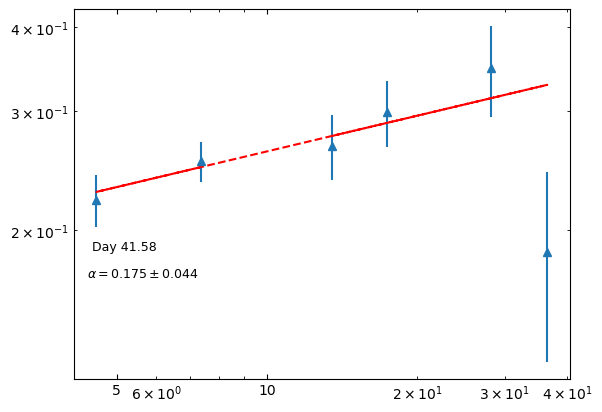

In [58]:
fig,ax = plt.subplots()
mask = df8['Flux Density (mJy)'] > 3 * df8['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df8['Freq (GHz)'][mask], df8['Flux Density (mJy)'][mask], yerr=yerr8, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 41.58', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df8['Freq (GHz)'][mask], fit_model_weights8(df8['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.175 \\pm 0.044}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

## Day 54.57 (df9)

In [59]:
mask = df9['Flux Density (mJy)'] > 3 * df9['Uncertainty (mJy)']  # apply detection threshold
if mask.any():
    x9 = df9['Freq (GHz)'][mask].values.tolist()
    y9 = df9['Flux Density (mJy)'][mask].values.tolist()
    yerr9 = df9['Uncertainty (mJy)'][mask].values.tolist()

In [60]:
yerr9 = error(yerr9, x9, y9)

In [61]:
fit9 = fitting.LevMarLSQFitter(calc_uncertainties=True)

PL9 =  PowerLaw1D(amplitude = y9[0], x_0= x9[0], alpha= -.3,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        #'x_0': (x3[0], x3[0]),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    },
                 fixed={'x_0': True}) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 


    #Fit the data w/o weights
fit_model9 = fit9(PL9, x9, y9)

    #weight is 1/error^2
y_weight9 = 1/ (np.power(yerr9,2))  

    # fit the data using the uncertainties as weights
fit_model_weights9 = fit9(PL9, x9, y9, weights=y_weight9)

fit_model_weights9

<PowerLaw1D(amplitude=0.45432276, x_0=13.5, alpha=0.48561018)>

In [62]:
fit9.fit_info

{'nfev': 6,
 'fvec': array([-0.99027739,  1.37545225, -1.74941899,  0.97714921]),
 'fjac': array([[-6.48899589e+02,  7.08377984e-01,  3.55365174e-01,
          2.16775480e-01],
        [ 7.87469409e+01,  8.12642628e+01,  7.30326898e-01,
          6.48392761e-01]]),
 'ipvt': array([1, 2], dtype=int32),
 'qtf': array([-1.95571073e-07, -3.98003911e-05]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[4.60494095e-06, 1.83762543e-05],
        [1.83762543e-05, 1.51426122e-04]]),
 'njev': 5,
 'cov_x': array([[4.60494095e-06, 1.83762543e-05],
        [1.83762543e-05, 1.51426122e-04]])}

In [63]:
#taking fvec
fvec9 = np.array([-0.99027739,  1.37545225, -1.74941899,  0.97714921])
var9 = np.var(fvec9)



param_cov9= np.array([[4.60494095e-06, 1.83762543e-05],
        [1.83762543e-05, 1.51426122e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    #sd3 = np.sqrt(diag[2])
    return(sd1,sd2)#,sd3)

diag9 = stand(param_cov9*var9) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print("The standard deviation is", diag9[1]) #Just showing the standard devation on the slope


The standard deviation is 0.01610373537507134


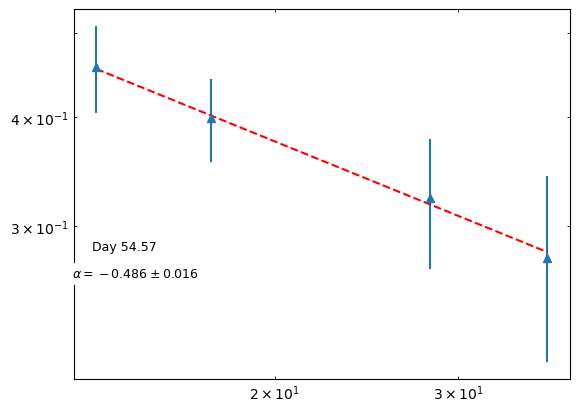

In [64]:
fig,ax = plt.subplots()
mask = df9['Flux Density (mJy)'] > 3 * df9['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df9['Freq (GHz)'][mask], df9['Flux Density (mJy)'][mask], yerr=yerr9, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 54.57', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df9['Freq (GHz)'][mask], fit_model_weights9(df9['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.486 \\pm 0.016}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

## Day 55.73 (df10)

In [65]:
mask = df10['Flux Density (mJy)'] > 3 * df10['Uncertainty (mJy)']  # apply detection threshold
if mask.any():
    x10 = df10['Freq (GHz)'][mask].values.tolist()
    y10 = df10['Flux Density (mJy)'][mask].values.tolist()
    yerr10 = df10['Uncertainty (mJy)'][mask].values.tolist()

In [66]:
yerr10 = error(yerr10, x10, y10)

In [67]:
fit10 = fitting.LevMarLSQFitter(calc_uncertainties=True)

PL10 =  PowerLaw1D(amplitude = y10[0], x_0= x10[0], alpha= -.3,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        #'x_0': (x3[0], x3[0]),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    },
                 fixed={'x_0': True}) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 


    #Fit the data w/o weights
fit_model10 = fit10(PL10, x10, y10)

    #weight is 1/error^2
y_weight10 = 1/ (np.power(yerr10,2))  

    # fit the data using the uncertainties as weights
fit_model_weights10 = fit10(PL10, x10, y10, weights=y_weight10)

fit_model_weights10

<PowerLaw1D(amplitude=0.83889036, x_0=1.26, alpha=0.45167875)>

In [68]:
fit10.fit_info

{'nfev': 7,
 'fvec': array([ -2.86507464,  15.07640284, -14.01750704,   6.54571147]),
 'fjac': array([[-1.39080037e+03, -3.95873617e-02, -4.57417425e-01,
         -8.88370497e-01],
        [ 1.01840800e+03, -2.33054739e+02,  7.00252406e-01,
          1.33383775e-02]]),
 'ipvt': array([2, 1], dtype=int32),
 'qtf': array([0.00013147, 0.00058873]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[1.84112860e-05, 1.34815904e-05],
        [1.34815904e-05, 1.03888166e-05]]),
 'njev': 6,
 'cov_x': array([[1.84112860e-05, 1.34815904e-05],
        [1.34815904e-05, 1.03888166e-05]])}

In [69]:
#taking fvec
fvec10 = np.array([ -2.86507464,  15.07640284, -14.01750704,   6.54571147])
var10 = np.var(fvec10)



param_cov10= np.array([[1.84112860e-05, 1.34815904e-05],
        [1.34815904e-05, 1.03888166e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    #sd3 = np.sqrt(diag[2])
    return(sd1,sd2)#,sd3)

diag10 = stand(param_cov10*var10) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print("The standard deviation is", diag10[1]) #Just showing the standard devation on the slope


The standard deviation is 0.03490959660853281


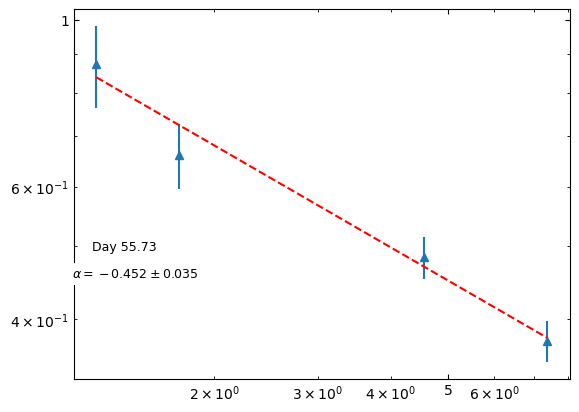

In [70]:
fig,ax = plt.subplots()
mask = df10['Flux Density (mJy)'] > 3 * df10['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df10['Freq (GHz)'][mask], df10['Flux Density (mJy)'][mask], yerr=yerr10, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 55.73', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df10['Freq (GHz)'][mask], fit_model_weights10(df10['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.452 \\pm 0.035}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

## Day 65.51 (df11)

In [71]:
mask = df11['Flux Density (mJy)'] > 3 * df11['Uncertainty (mJy)']  # apply detection threshold
if mask.any():
    x11 = df11['Freq (GHz)'][mask].values.tolist()
    y11 = df11['Flux Density (mJy)'][mask].values.tolist()
    yerr11 = df11['Uncertainty (mJy)'][mask].values.tolist()

In [72]:
yerr11 = error(yerr11, x11, y11)

In [73]:
fit11 = fitting.LevMarLSQFitter(calc_uncertainties=True)

PL11 =  PowerLaw1D(amplitude = y11[0], x_0= x11[0], alpha= -.3,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        #'x_0': (x3[0], x3[0]),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    },
                 fixed={'x_0': True}) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 


    #Fit the data w/o weights
fit_model11 = fit11(PL11, x11, y11)

    #weight is 1/error^2
y_weight11 = 1/ (np.power(yerr11,2))  

    # fit the data using the uncertainties as weights
fit_model_weights11 = fit11(PL11, x11, y11, weights=y_weight11)

fit_model_weights11

<PowerLaw1D(amplitude=0.33740812, x_0=1.26, alpha=0.22070763)>

In [74]:
fit11.fit_info

{'nfev': 7,
 'fvec': array([-15.00759268,  17.02025024,  -4.03749061,   1.54885836]),
 'fjac': array([[-3.03644984e+03,  9.28676411e-02,  5.39638333e-01,
          8.35473551e-01],
        [ 1.65005263e+03, -2.67475701e+02,  5.27441329e-01,
         -7.31149412e-01]]),
 'ipvt': array([1, 2], dtype=int32),
 'qtf': array([2.82383377e-07, 5.07840440e-05]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[4.23603194e-06, 7.59561626e-06],
        [7.59561626e-06, 1.39775589e-05]]),
 'njev': 6,
 'cov_x': array([[4.23603194e-06, 7.59561626e-06],
        [7.59561626e-06, 1.39775589e-05]])}

In [75]:
#taking fvec
fvec11 = np.array([-15.00759268,  17.02025024,  -4.03749061,   1.54885836])
var11 = np.var(fvec11)



param_cov11= np.array([[4.23603194e-06, 7.59561626e-06],
        [7.59561626e-06, 1.39775589e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    #sd3 = np.sqrt(diag[2])
    return(sd1,sd2)#,sd3)

diag11 = stand(param_cov11*var11) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print("The standard deviation is", diag11[1]) #Just showing the standard devation on the slope


The standard deviation is 0.043179486074868836


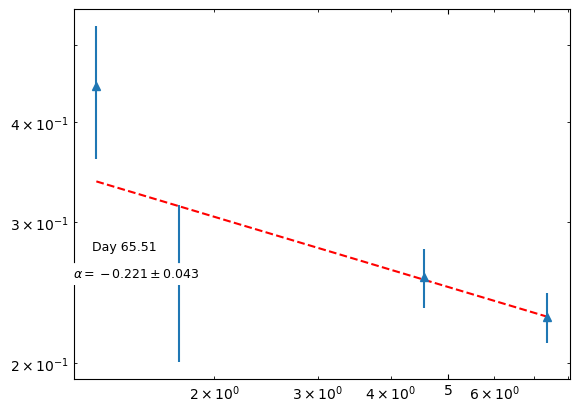

In [76]:
fig,ax = plt.subplots()
mask = df11['Flux Density (mJy)'] > 3 * df11['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df11['Freq (GHz)'][mask], df11['Flux Density (mJy)'][mask], yerr=yerr11, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 65.51', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df11['Freq (GHz)'][mask], fit_model_weights11(df11['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.221 \\pm 0.043}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

## Day 66.49 (df12)

In [77]:
mask = df12['Flux Density (mJy)'] > 3 * df12['Uncertainty (mJy)']  # apply detection threshold
if mask.any():
    x12 = df12['Freq (GHz)'][mask].values.tolist()
    y12 = df12['Flux Density (mJy)'][mask].values.tolist()
    yerr12 = df12['Uncertainty (mJy)'][mask].values.tolist()

In [78]:
yerr12 = error(yerr12, x12, y12)

In [79]:
fit12 = fitting.LevMarLSQFitter(calc_uncertainties=True)

PL12 =  PowerLaw1D(amplitude = y12[0], x_0= x12[0], alpha= -.3,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        #'x_0': (x3[0], x3[0]),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    },
                 fixed={'x_0': True}) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 


    #Fit the data w/o weights
fit_model12 = fit12(PL12, x12, y12)

    #weight is 1/error^2
y_weight12 = 1/ (np.power(yerr12,2))  

    # fit the data using the uncertainties as weights
fit_model_weights12 = fit12(PL12, x12, y12, weights=y_weight12)

fit_model_weights12

<PowerLaw1D(amplitude=0.20546738, x_0=13.5, alpha=0.63131141)>

In [80]:
fit12.fit_info

{'nfev': 7,
 'fvec': array([ -5.19373065,  10.49158477, -16.7565106 ]),
 'fjac': array([[-1.85789633e+03,  5.97635386e-01,  1.28914374e-01],
        [ 3.92746431e+01,  5.58900236e+01,  5.98034741e-01]]),
 'ipvt': array([1, 2], dtype=int32),
 'qtf': array([-1.68779951e-07, -1.65762952e-03]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[4.32763969e-07, 6.76740525e-06],
        [6.76740525e-06, 3.20133715e-04]]),
 'njev': 6,
 'cov_x': array([[4.32763969e-07, 6.76740525e-06],
        [6.76740525e-06, 3.20133715e-04]])}

In [81]:
#taking fvec
fvec12 = np.array([ -5.19373065,  10.49158477, -16.7565106 ])
var12 = np.var(fvec12)



param_cov12= np.array([[4.32763969e-07, 6.76740525e-06],
        [6.76740525e-06, 3.20133715e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
   #sd3 = np.sqrt(diag[2])
    return(sd1,sd2)#,sd3)

diag12 = stand(param_cov12*var12) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print("The standard deviation is", diag12[1]) #Just showing the standard devation on the slope


The standard deviation is 0.19979141274887682


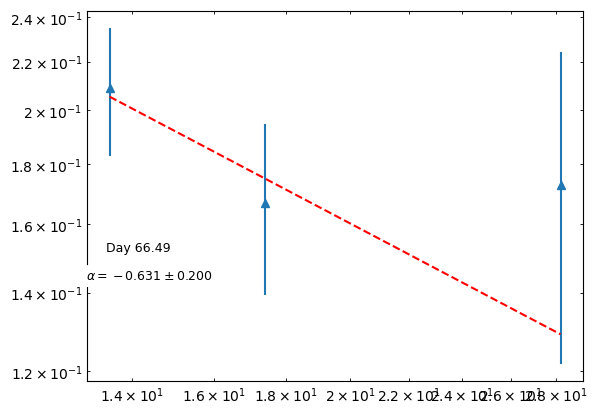

In [82]:
fig,ax = plt.subplots()
mask = df12['Flux Density (mJy)'] > 3 * df12['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df12['Freq (GHz)'][mask], df12['Flux Density (mJy)'][mask], yerr=yerr12, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 66.49', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df12['Freq (GHz)'][mask], fit_model_weights12(df12['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.631 \\pm 0.200}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

## Day 78.463 (df13)

In [83]:
mask = df13['Flux Density (mJy)'] > 3 * df13['Uncertainty (mJy)']  # apply detection threshold
if mask.any():
    x13 = df13['Freq (GHz)'][mask].values.tolist()
    y13 = df13['Flux Density (mJy)'][mask].values.tolist()
    yerr13 = df13['Uncertainty (mJy)'][mask].values.tolist()

In [84]:
yerr13 = error(yerr13, x13, y13)

In [85]:
fit13 = fitting.LevMarLSQFitter(calc_uncertainties=True)

PL13 =  PowerLaw1D(amplitude = y13[0], x_0= x13[0], alpha= -.3,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        #'x_0': (x3[0], x3[0]),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    },
                 fixed={'x_0': True}) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 


    #Fit the data w/o weights
fit_model13 = fit13(PL13, x13, y13)

    #weight is 1/error^2
y_weight13 = 1/ (np.power(yerr13,2))  

    # fit the data using the uncertainties as weights
fit_model_weights13 = fit13(PL13, x13, y13, weights=y_weight13)

fit_model_weights13

<PowerLaw1D(amplitude=0.15734792, x_0=4.55, alpha=0.1446789)>

In [86]:
fit13.fit_info

{'nfev': 7,
 'fvec': array([-31.07549812,  30.17309246,  12.12349022, -46.77974398,
        -17.49529858]),
 'fjac': array([[-4.92735222e+03,  7.40175147e-01,  3.86503215e-01,
          2.27259817e-01,  5.13082595e-02],
        [ 3.88824238e+02,  3.05246356e+02,  7.39091555e-01,
          5.81065589e-01,  1.94111353e-01]]),
 'ipvt': array([1, 2], dtype=int32),
 'qtf': array([ 1.96602416e-06, -6.11998395e-03]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[1.08019276e-07, 8.46912896e-07],
        [8.46912896e-07, 1.07324537e-05]]),
 'njev': 6,
 'cov_x': array([[1.08019276e-07, 8.46912896e-07],
        [8.46912896e-07, 1.07324537e-05]])}

In [87]:
#taking fvec
fvec13 = np.array([-31.07549812,  30.17309246,  12.12349022, -46.77974398,
        -17.49529858])
var13 = np.var(fvec13)



param_cov13= np.array([[1.08019276e-07, 8.46912896e-07],
        [8.46912896e-07, 1.07324537e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    #sd3 = np.sqrt(diag[2])
    return(sd1,sd2)#,sd3)

diag13 = stand(param_cov13*var13) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print("The standard deviation is", diag13[1]) #Just showing the standard devation on the slope


The standard deviation is 0.09213273276606208


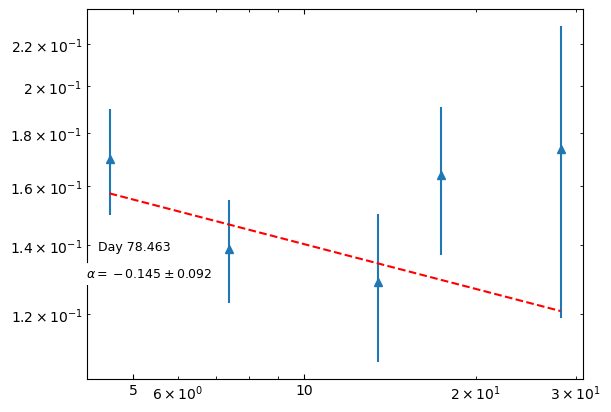

In [88]:
fig,ax = plt.subplots()
mask = df13['Flux Density (mJy)'] > 3 * df13['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df13['Freq (GHz)'][mask], df13['Flux Density (mJy)'][mask], yerr=yerr13, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 78.463', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df13['Freq (GHz)'][mask], fit_model_weights13(df13['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.145 \\pm 0.092}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

## Day 93.46 (df14)

In [89]:
mask = df14['Flux Density (mJy)'] > 3 * df14['Uncertainty (mJy)']  # apply detection threshold
if mask.any():
    x14 = df14['Freq (GHz)'][mask].values.tolist()
    y14 = df14['Flux Density (mJy)'][mask].values.tolist()
    yerr14 = df14['Uncertainty (mJy)'][mask].values.tolist()

In [90]:
yerr14 = error(yerr14, x14, y14)

In [91]:
fit14= fitting.LevMarLSQFitter(calc_uncertainties=True)

PL14 =  PowerLaw1D(amplitude = y14[0], x_0= x14[0], alpha= -5.5,
                  bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        #'x_0': (x3[0], x3[0]),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    },
                 fixed={'x_0': True}) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 


    #Fit the data w/o weights
fit_model14 = fit14(PL14, x14, y14)

    #weight is 1/error^2
y_weight14 = 1/ (np.power(yerr14,2))  

    # fit the data using the uncertainties as weights
fit_model_weights14 = fit14(PL14, x14, y14, weights=y_weight14)

fit_model_weights14

<PowerLaw1D(amplitude=0.0727, x_0=4.55, alpha=0.05475567)>

In [92]:
fit14.fit_info

{'nfev': 9,
 'fvec': array([0., 0.]),
 'fjac': array([[-3.68789572e+03,  8.65971381e-01],
        [ 9.72407023e+01,  5.61559539e+01]]),
 'ipvt': array([1, 2], dtype=int32),
 'qtf': array([-3.51143644e-11, -2.02783462e-11]),
 'message': 'The relative error between two consecutive iterates is at most 0.000000',
 'ierr': 2,
 'param_jac': None,
 'param_cov': None,
 'njev': 8,
 'cov_x': array([[2.93995181e-07, 8.36137761e-06],
        [8.36137761e-06, 3.17108865e-04]])}

In [93]:
#taking fvec
fvec14 = np.array([0.0000000e+00, 9.4920063e-14])
var14 = np.var(fvec14)



param_cov14= np.array([[2.93995181e-07, 8.36137761e-06],
        [8.36137761e-06, 3.17108865e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    #sd3 = np.sqrt(diag[2])
    return(sd1,sd2)#,sd3)

diag14 = stand(param_cov14)#*var14) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print("The standard deviation is", diag14[1]) #Just showing the standard devation on the slope


The standard deviation is 0.017807550786113176


In [94]:
alpha_err14 = two_points(y14,x14,yerr14)
print(alpha_err14)

(-0.054755671768581815, 0.8358521859860462)


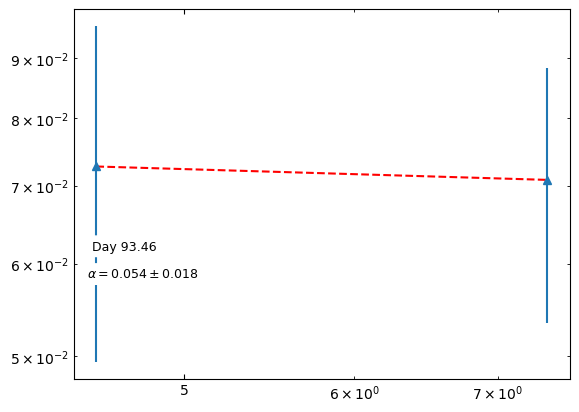

In [95]:
fig,ax = plt.subplots()
mask = df14['Flux Density (mJy)'] > 3 * df14['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df14['Freq (GHz)'][mask], df14['Flux Density (mJy)'][mask], yerr=yerr14, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 93.46', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df14['Freq (GHz)'][mask], fit_model_weights14(df14['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.054 \\pm 0.018}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

In [96]:
mask = df15['Flux Density (mJy)'] > 3 * df15['Uncertainty (mJy)']

yerr15 = (df15['Uncertainty (mJy)'][mask].values.tolist(), df15['Freq (GHz)'][mask].values.tolist(), df15['Flux Density (mJy)'][mask].values.tolist())

In [97]:
yerr15

([0.0157], [13.5], [0.0587])

# All together now

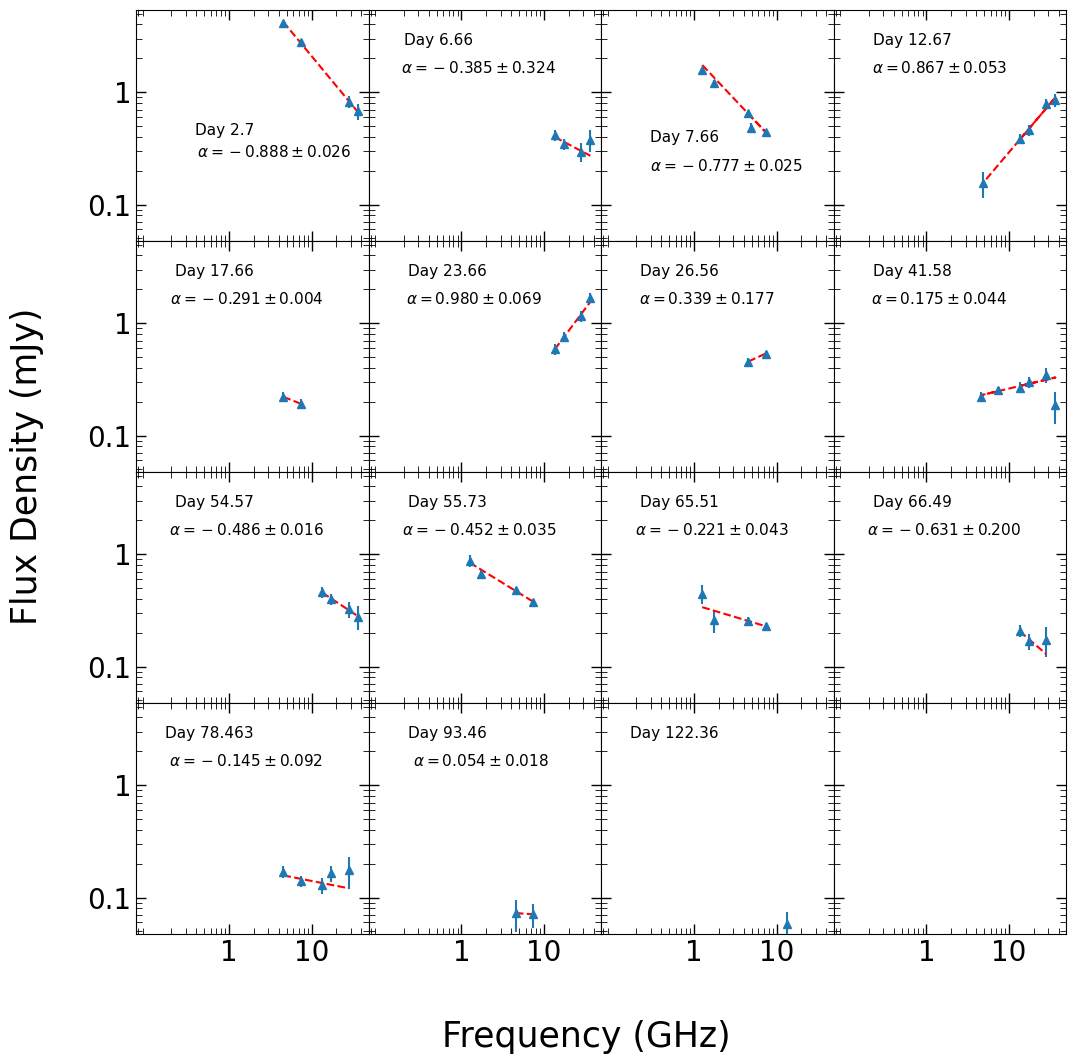

In [105]:
#four by four

fig, ax = plt.subplots(4, 4, sharex='all', sharey='all',squeeze=True, width_ratios=None, height_ratios=None)
fig.set_size_inches(12,12)
fig.subplots_adjust(hspace=0, wspace=0)


mask = df1['Flux Density (mJy)'] > 3 * df1['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0,0].errorbar(df1['Freq (GHz)'][mask], df1['Flux Density (mJy)'][mask], yerr=yerr1, fmt='^')
    ax[0,0].set_xscale('log')
    ax[0,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'], fontsize = 20)
    ax[0,0].set_yscale('log')
    ax[0,0].set_yticks([0.1,1, 5, 10, 20], labels=['0.1','1', '5', '10', '20'], fontsize = 20)
    ax[0,0].annotate('Day 2.7', xy=(85, 85), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0,0].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[0,0].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[0,0].plot(df1['Freq (GHz)'][mask], fit_model_weights1(df1['Freq (GHz)'][mask]), 'r--')
    ax[0,0].annotate('${\u03B1 = -0.888 \\pm 0.026}$', xy=(155, 70), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df2['Flux Density (mJy)'] > 3 * df2['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0,1].errorbar(df2['Freq (GHz)'][mask], df2['Flux Density (mJy)'][mask], yerr=yerr2, fmt='^')
    ax[0,1].set_xscale('log')
    ax[0,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[0,1].set_yscale('log')
    ax[0,1].set_yticks([1, 5, 10, 20], labels=['1', '5', '10', '20'])
    ax[0,1].annotate('Day 6.66', xy=(75, 150), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0,1].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[0,1].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[0,1].plot(df2['Freq (GHz)'][mask], fit_model_weights2(df2['Freq (GHz)'][mask]), 'r--')
    ax[0,1].annotate('${\u03B1 = -0.385 \\pm 0.324}$', xy=(135, 130), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df3['Flux Density (mJy)'] > 3 * df3['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0,2].errorbar(df3['Freq (GHz)'][mask], df3['Flux Density (mJy)'][mask], yerr=yerr3, fmt='^')
    ax[0,2].set_xscale('log')
    ax[0,2].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[0,2].set_yscale('log')
    ax[0,2].set_yticks([1, 5, 10, 20], labels=['1', '5', '10', '20'])
    ax[0,2].annotate('Day 7.66', xy=(85, 80), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0,2].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[0,2].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[0,2].plot(df3['Freq (GHz)'][mask], fit_model_weights3(df3['Freq (GHz)'][mask]), 'r--')
    ax[0,2].annotate('${\u03B1 = -0.777 \\pm 0.025}$', xy=(145, 60), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df4['Flux Density (mJy)'] > 3 * df4['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0,3].errorbar(df4['Freq (GHz)'][mask], df4['Flux Density (mJy)'][mask], yerr=yerr4, fmt='^')
    ax[0,3].set_xscale('log')
    ax[0,3].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[0,3].set_yscale('log')
    ax[0,3].set_yticks([1, 5, 10, 20], labels=['1', '5', '10', '20'])
    ax[0,3].annotate('Day 12.67', xy=(85, 150), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0,3].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[0,3].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[0,3].plot(df4['Freq (GHz)'][mask], fit_model_weights4(df4['Freq (GHz)'][mask]), 'r--')
    ax[0,3].annotate('${\u03B1 = 0.867 \\pm 0.053}$', xy=(125, 130), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


#next row
mask = df5['Flux Density (mJy)'] > 3 * df5['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1,0].errorbar(df5['Freq (GHz)'][mask], df5['Flux Density (mJy)'][mask], yerr=yerr5, fmt='^')
    ax[1,0].set_xscale('log')
    ax[1,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'], fontsize = 20)
    ax[1,0].set_yscale('log')
    ax[1,0].set_yticks([1, 5, 10, 20], labels=['1', '5', '10', '20'], fontsize = 20)
    ax[1,0].annotate('Day 17.66', xy=(85, 150), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,0].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[1,0].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[1,0].plot(df5['Freq (GHz)'][mask], fit_model_weights5(df5['Freq (GHz)'][mask]), 'r--')
    ax[1,0].annotate('${\u03B1 = -0.291 \\pm 0.004}$', xy=(135, 130), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df6['Flux Density (mJy)'] > 3 * df6['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1,1].errorbar(df6['Freq (GHz)'][mask], df6['Flux Density (mJy)'][mask], yerr=yerr6, fmt='^')
    ax[1,1].set_xscale('log')
    ax[1,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1,1].set_yscale('log')
    ax[1,1].set_yticks([1, 5, 10, 20], labels=['1', '5', '10', '20'])
    ax[1,1].annotate('Day 23.66', xy=(85, 150), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,1].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[1,1].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[1,1].plot(df6['Freq (GHz)'][mask], fit_model_weights6(df6['Freq (GHz)'][mask]), 'r--')
    ax[1,1].annotate('${\u03B1 = 0.980 \\pm 0.069}$', xy=(125, 130), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df7['Flux Density (mJy)'] > 3 * df7['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1,2].errorbar(df7['Freq (GHz)'][mask], df7['Flux Density (mJy)'][mask], yerr=yerr7, fmt='^')
    ax[1,2].set_xscale('log')
    ax[1,2].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1,2].set_yscale('log')
    ax[1,2].set_yticks([1, 5, 10, 20], labels=['1', '5', '10', '20'])
    ax[1,2].annotate('Day 26.56', xy=(85, 150), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,2].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[1,2].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
    ax[1,2].plot(df7['Freq (GHz)'][mask], fit_model_weights7(df7['Freq (GHz)'][mask]), 'r--')
    ax[1,2].annotate('${\u03B1 = 0.339 \\pm 0.177}$', xy=(125, 130), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df8['Flux Density (mJy)'] > 3 * df8['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1,3].errorbar(df8['Freq (GHz)'][mask], df8['Flux Density (mJy)'][mask], yerr=yerr8, fmt='^')
    ax[1,3].set_xscale('log')
    ax[1,3].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1,3].set_yscale('log')
    ax[1,3].set_yticks([1, 5, 10, 20], labels=['1', '5', '10', '20'])
    ax[1,3].annotate('Day 41.58', xy=(85, 150), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,3].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[1,3].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[1,3].plot(df8['Freq (GHz)'][mask], fit_model_weights8(df8['Freq (GHz)'][mask]), 'r--')
    ax[1,3].annotate('${\u03B1 = 0.175 \\pm 0.044}$', xy=(125, 130), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


#third row
mask = df9['Flux Density (mJy)'] > 3 * df9['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2,0].errorbar(df9['Freq (GHz)'][mask], df9['Flux Density (mJy)'][mask], yerr=yerr9, fmt='^')
    ax[2,0].set_xscale('log')
    ax[2,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'], fontsize = 20)
    ax[2,0].set_yscale('log')
    ax[2,0].set_yticks([1, 5, 10, 20], labels=['1', '5', '10', '20'], fontsize = 20)
    ax[2,0].annotate('Day 54.57', xy=(85, 150), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,0].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[2,0].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[2,0].plot(df9['Freq (GHz)'][mask], fit_model_weights9(df9['Freq (GHz)'][mask]), 'r--')
    ax[2,0].annotate('${\u03B1 = -0.486 \\pm 0.016}$', xy=(135, 130), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df10['Flux Density (mJy)'] > 3 * df10['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2,1].errorbar(df10['Freq (GHz)'][mask], df10['Flux Density (mJy)'][mask], yerr=yerr10, fmt='^')
    ax[2,1].set_xscale('log')
    ax[2,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[2,1].set_yscale('log')
    ax[2,1].set_yticks([1, 5, 10, 20], labels=['1', '5', '10', '20'])
    ax[2,1].annotate('Day 55.73', xy=(85, 150), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,1].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[2,1].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[2,1].plot(df10['Freq (GHz)'][mask], fit_model_weights10(df10['Freq (GHz)'][mask]), 'r--')
    ax[2,1].annotate('${\u03B1 = -0.452 \\pm 0.035}$', xy=(135, 130), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df11['Flux Density (mJy)'] > 3 * df11['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2,2].errorbar(df11['Freq (GHz)'][mask], df11['Flux Density (mJy)'][mask], yerr=yerr11, fmt='^')
    ax[2,2].set_xscale('log')
    ax[2,2].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[2,2].set_yscale('log')
    ax[2,2].set_yticks([1, 5, 10, 20], labels=['1', '5', '10', '20'])
    ax[2,2].annotate('Day 65.51', xy=(85, 150), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,2].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[2,2].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[2,2].plot(df11['Freq (GHz)'][mask], fit_model_weights11(df11['Freq (GHz)'][mask]), 'r--')
    ax[2,2].annotate('${\u03B1 = -0.221 \\pm 0.043}$', xy=(135, 130), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df12['Flux Density (mJy)'] > 3 * df12['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2,3].errorbar(df12['Freq (GHz)'][mask], df12['Flux Density (mJy)'][mask], yerr=yerr12, fmt='^')
    ax[2,3].set_xscale('log')
    ax[2,3].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'], fontsize = 20)
    ax[2,3].set_yscale('log')
    ax[2,3].set_yticks([1, 5, 10, 20], labels=['1', '5', '10', '20'], fontsize = 20)
    ax[2,3].annotate('Day 66.49', xy=(85, 150), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,3].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[2,3].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[2,3].plot(df12['Freq (GHz)'][mask], fit_model_weights12(df12['Freq (GHz)'][mask]), 'r--')
    ax[2,3].annotate('${\u03B1 = -0.631 \\pm 0.200}$', xy=(135, 130), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


#fourth one
mask = df13['Flux Density (mJy)'] > 3 * df13['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[3,0].errorbar(df13['Freq (GHz)'][mask], df13['Flux Density (mJy)'][mask], yerr=yerr13, fmt='^')
    ax[3,0].set_xscale('log')
    ax[3,0].set_xticks([1,  10], labels=['1',  '10'], fontsize = 20)
    ax[3,0].set_yscale('log')
    ax[3,0].set_yticks([1,  10], labels=['1',  '10'], fontsize = 20)
    ax[3,0].annotate('Day 78.463', xy=(85, 150), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3,0].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[3,0].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[3,0].plot(df13['Freq (GHz)'][mask], fit_model_weights13(df13['Freq (GHz)'][mask]), 'r--')
    ax[3,0].annotate('${\u03B1 = -0.145 \\pm 0.092}$', xy=(135, 130), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df14['Flux Density (mJy)'] > 3 * df14['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[3,1].errorbar(df14['Freq (GHz)'][mask], df14['Flux Density (mJy)'][mask], yerr=yerr14, fmt='^')
    ax[3,1].set_xscale('log')
    ax[3,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'], fontsize = 20)
    ax[3,1].set_yscale('log')
    ax[3,1].set_yticks([1, 5, 10, 20], labels=['1', '5', '10', '20'], fontsize = 20)
    ax[3,1].annotate('Day 93.46', xy=(85, 150), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3,1].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[3,1].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[3,1].plot(df14['Freq (GHz)'][mask], fit_model_weights14(df14['Freq (GHz)'][mask]), 'r--')
    ax[3,1].annotate('${\u03B1 = 0.054 \\pm 0.018}$', xy=(130, 130), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df15['Flux Density (mJy)'] > 3 * df15['Uncertainty (mJy)']
if mask.any():
    ax[3,2].errorbar(df15['Freq (GHz)'][mask], df15['Flux Density (mJy)'][mask], yerr=df15['Uncertainty (mJy)'][mask], fmt='^')
    ax[3,2].set_xscale('log')
    ax[3,2].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'], fontsize = 20)
    ax[3,2].set_yscale('log')
    ax[3,2].set_yticks([0.1,1, 5, 10, 20], labels=['0.1','1', '5', '10', '20'], fontsize = 20)
    ax[3,2].annotate('Day 122.36', xy=(85, 150), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3,2].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[3,2].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)


ax[3,3].set_xscale('log')
ax[3,3].set_xticks([1, 10], labels=['1', '10'], fontsize = 20)
ax[3,3].set_yscale('log')
ax[3,3].set_yticks([0.1,1], labels=['0.1','1'], fontsize = 20)
ax[3,3].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
ax[3,3].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)


fig.supxlabel("Frequency (GHz)", fontsize = 25)
fig.supylabel("Flux Density (mJy)", fontsize = 25)
plt.savefig("V1535Sco_SI.png")
#plt.legend()
plt.show();